In [8]:
import cv2
import numpy as np
from superpoint.datasets.synthetic_shapes import SyntheticShapes
from utils import plot_imgs

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
config = {
    'primitives': 'all',
    'on-the-fly': True,
    'preprocessing': {'resize': [120, 160], 'blur_size': 21}
}
dataset = SyntheticShapes(**config)
data = dataset.get_test_set()

2023-04-07 07:22:01.860370: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: UNKNOWN ERROR (34)


In [3]:
def draw_keypoints(img, corners, color):
    keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in np.stack(corners).astype(np.float32).T]
    return cv2.drawKeypoints(np.array(img).astype(np.uint8), keypoints, None, color=color)
def display(d):
    return draw_keypoints(d['image'][..., 0] * 255, np.where(d['keypoint_map']), (0, 255, 0))

2023-04-07 07:25:01.573183: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-04-07 07:25:01.573487: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-04-07 07:25:02.548887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-04-07 07:25:02.54

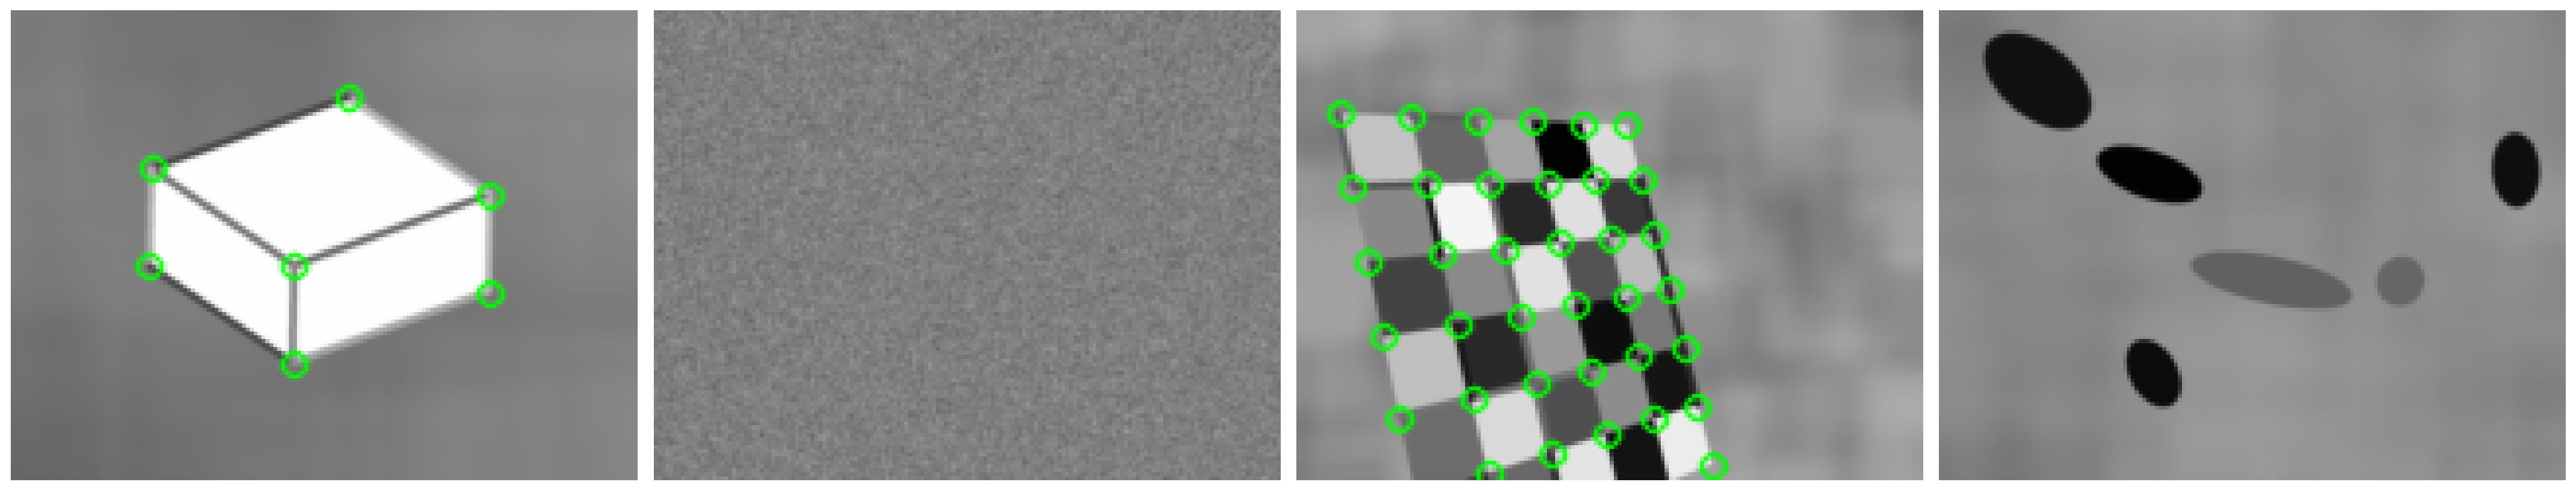

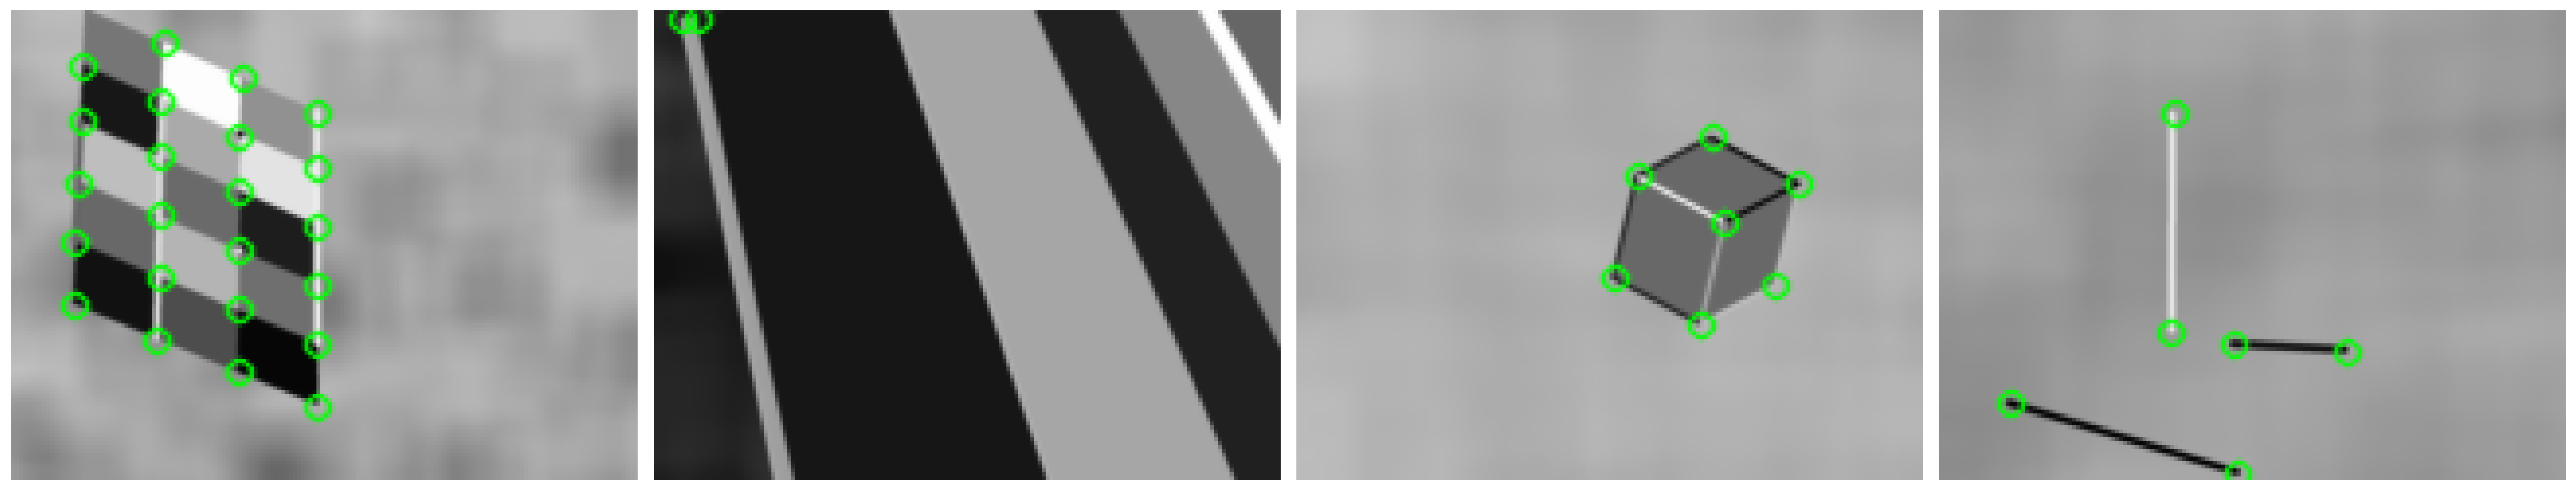

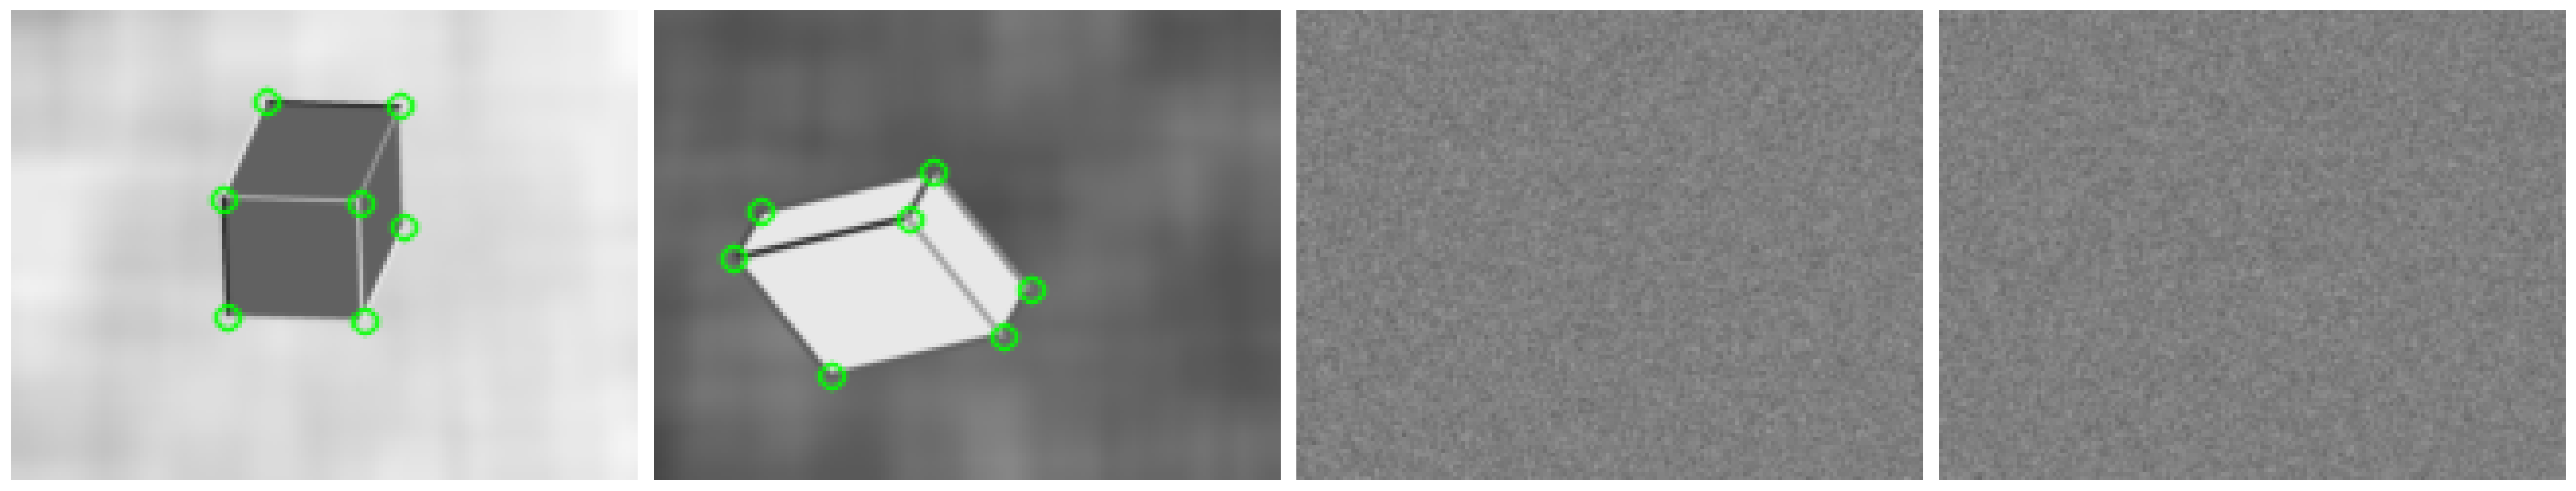

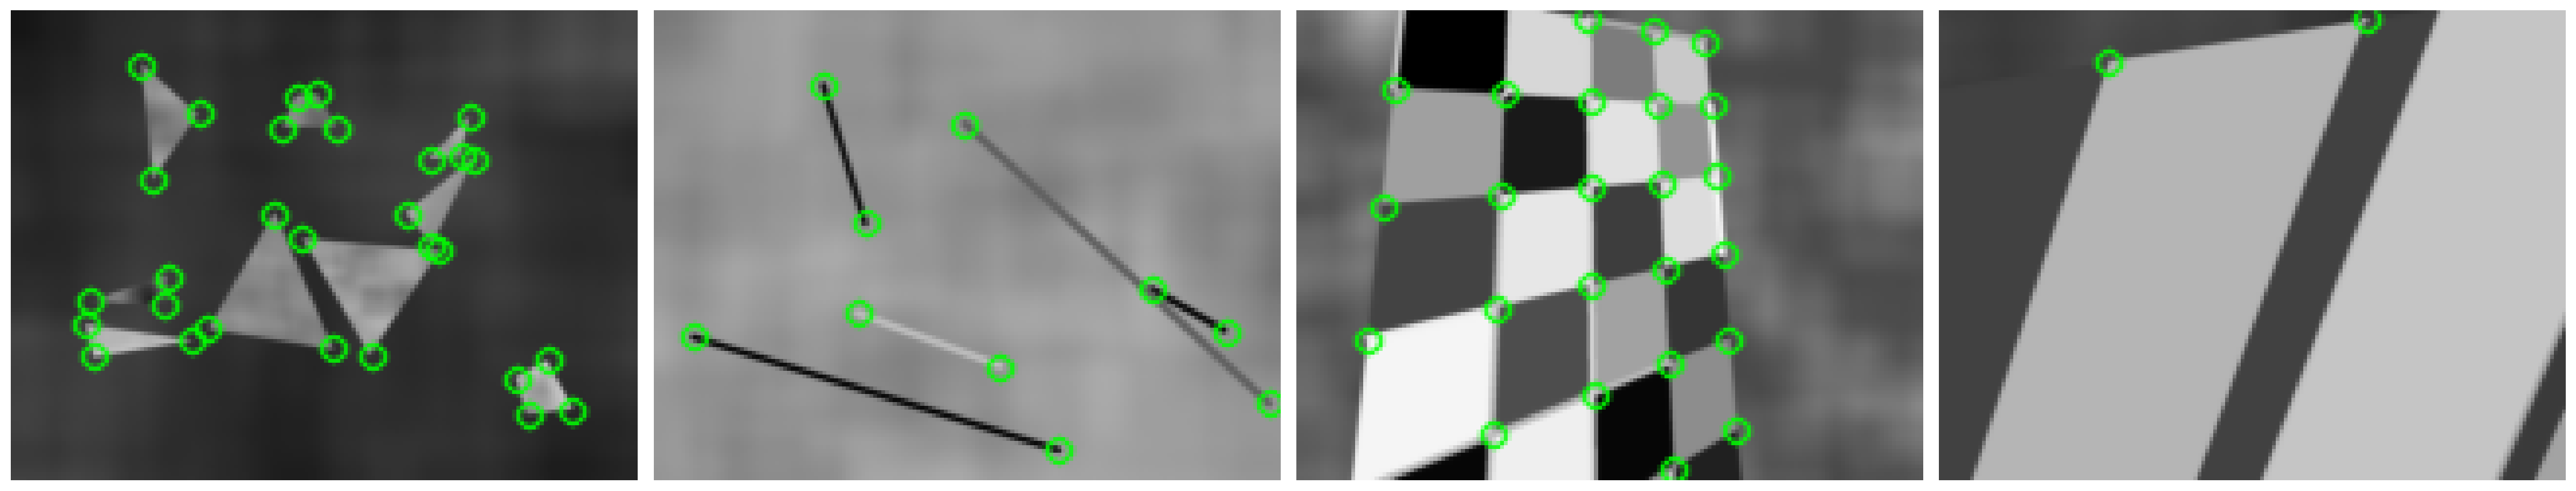

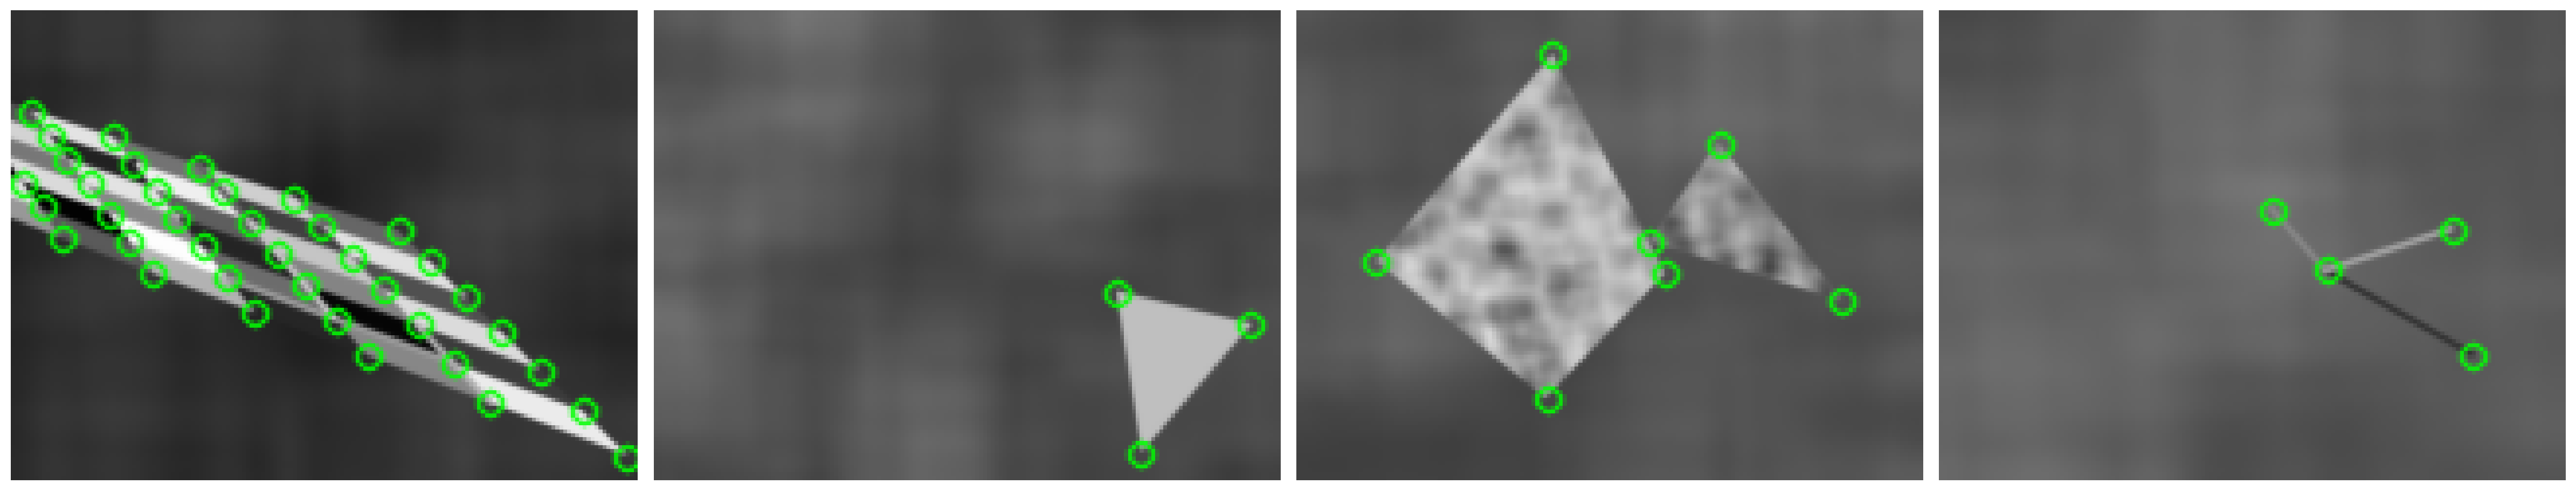

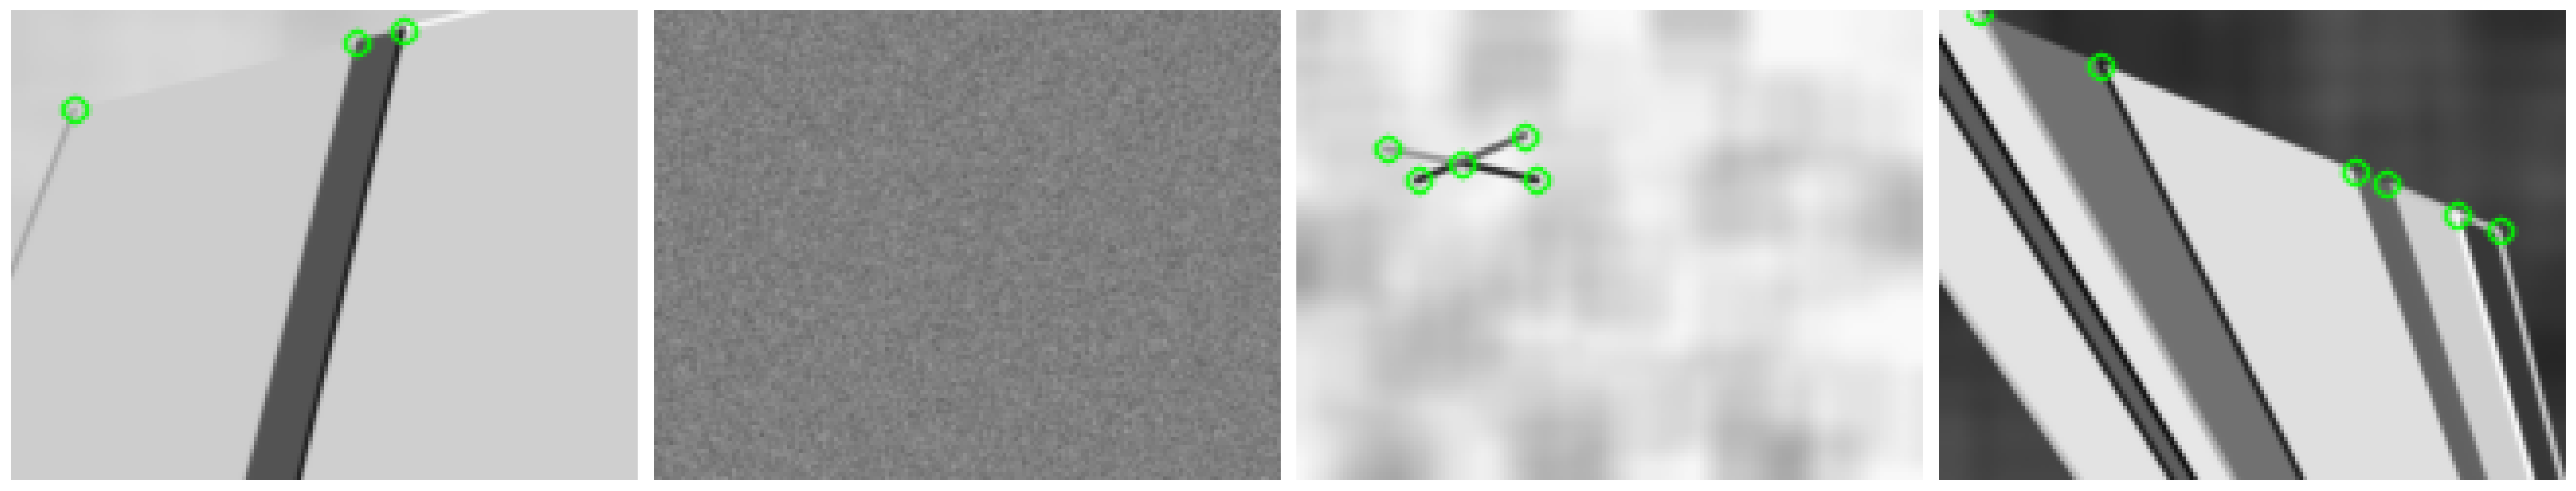

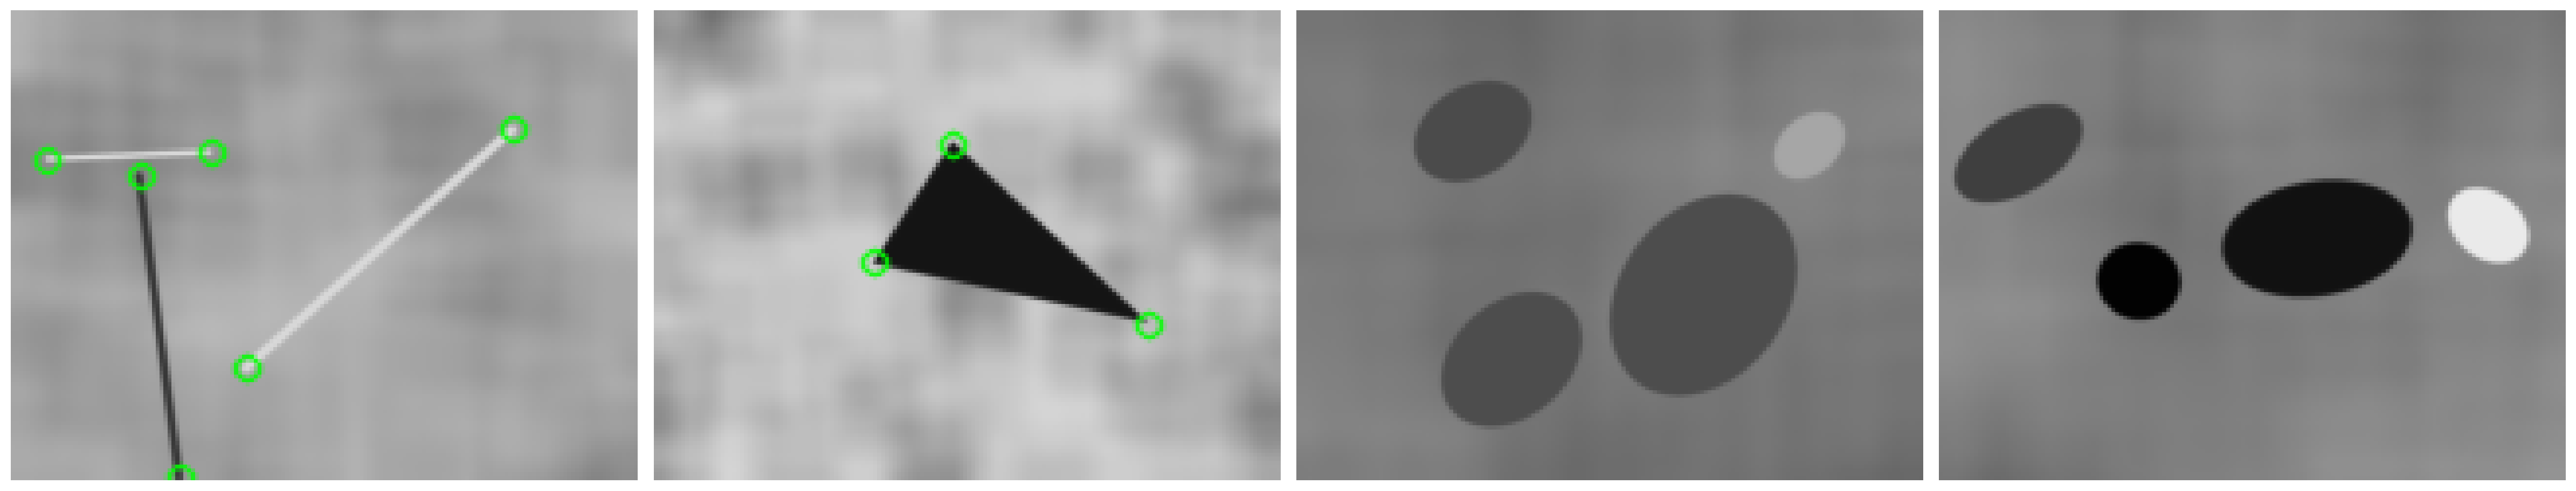

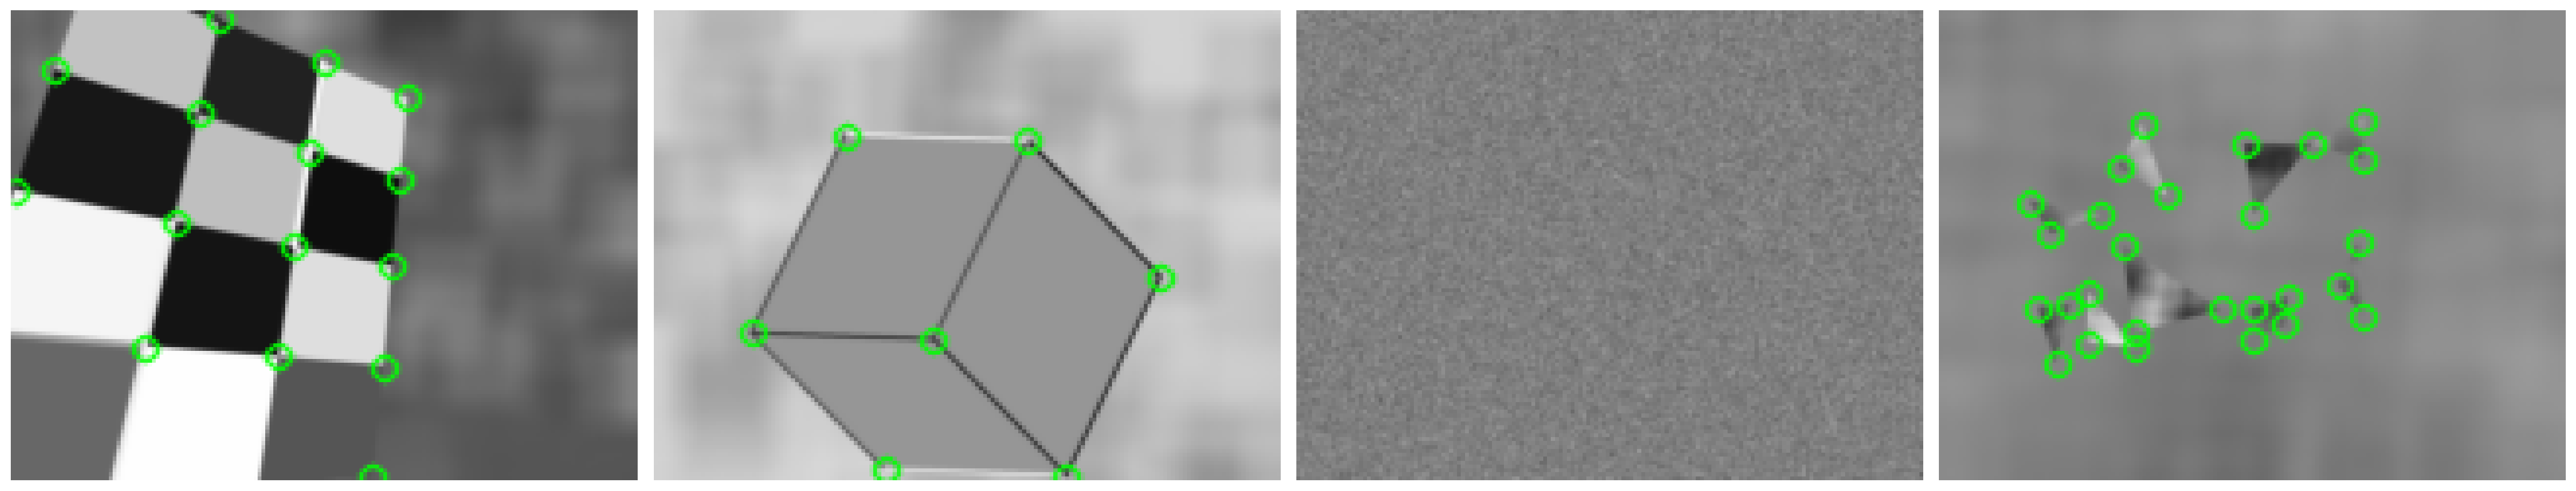

In [9]:
for i in range(8):
    plot_imgs([display(d)/255. for d in data.take(4)], dpi=200)